In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
data_raw = pd.read_csv("/home/pepe/dev/datasets/dataset/target1.csv", header=0)

In [4]:
data_raw.describe()

,Unnamed: 0,id,linear,angular
count,11797.000000,11797.000000,11797.000000,11797.000000
mean,5898.000000,6487.901924,0.157160,0.091016
std,3405.644897,3686.283609,0.069144,0.627228
min,0.000000,120.000000,-1.088268,-1.000000
25%,2949.000000,3166.000000,0.140883,-0.284871
50%,5898.000000,6666.000000,0.165748,0.021191
75%,8847.000000,9752.000000,0.190612,0.638982
max,11796.000000,12701.000000,0.527557,1.000000


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'id'}>],
       [<AxesSubplot:title={'center':'linear'}>,
        <AxesSubplot:title={'center':'angular'}>]], dtype=object)

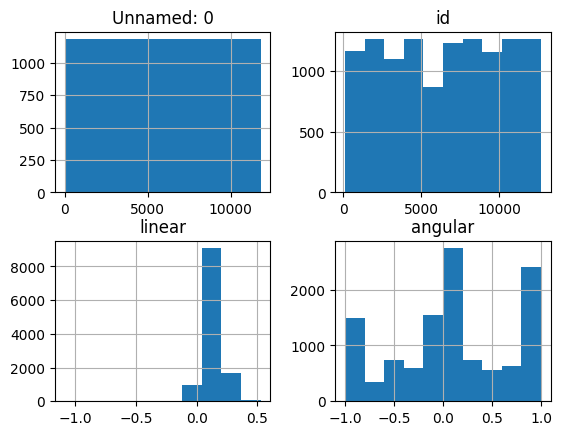

In [6]:
data_raw.hist()

In [4]:
n_buckets = 5
angular_buckets_space = np.linspace(-1.0, 1.0, 6)


In [5]:
angular_buckets_space

array([-1. , -0.6, -0.2,  0.2,  0.6,  1. ])

In [6]:
angular_5_labels = ["L", "ML", "C", "MR", "R"]

In [7]:
angles = [[-1,-0.6], [-0.6, -0.2], [-0.2, 0.2], [0.2, 0.6], [0.6, 1]]

In [8]:
angles_df = pd.DataFrame(angles, index=angular_5_labels, columns=["start", "end"])
angles_df

,start,end
L,-1.0,-0.6
ML,-0.6,-0.2
C,-0.2,0.2
MR,0.2,0.6
R,0.6,1.0


In [9]:
L_df = data_raw[(data_raw["angular"] < -0.6) & (data_raw["angular"] > -1)]
ML_df = data_raw[(data_raw["angular"] < -0.2) & (data_raw["angular"] > -0.6)]
C_df = data_raw[(data_raw["angular"] < 0.2) & (data_raw["angular"] > -0.2)]
MR_df = data_raw[(data_raw["angular"] < 0.6) & (data_raw["angular"] > 0.2)]
R_df = data_raw[(data_raw["angular"] < 1) & (data_raw["angular"] > 0.6)]

In [10]:
L_df.describe()

,Unnamed: 0,id,linear,angular
count,610.000000,610.000000,610.000000,610.000000
mean,5367.657377,5913.436066,0.163282,-0.782939
std,3717.415818,4027.050728,0.043902,0.131262
min,204.000000,324.000000,0.000000,-0.999743
25%,1942.250000,2159.250000,0.149171,-0.887082
50%,5540.500000,6308.500000,0.165748,-0.762759
75%,8813.750000,9718.750000,0.182324,-0.665614
max,11638.000000,12543.000000,0.314951,-0.603452


In [24]:
ML_df.describe()

,Unnamed: 0,id,linear,angular
count,1322.000000,1322.000000,1322.000000,1322.000000
mean,5602.795008,6175.180030,0.151457,-0.407253
std,3732.604282,4044.093396,0.039951,0.114210
min,25.000000,145.000000,0.000000,-0.599565
25%,1611.250000,1828.250000,0.136739,-0.513109
50%,5864.500000,6632.500000,0.153315,-0.420855
75%,9107.750000,10012.750000,0.169892,-0.313020
max,11636.000000,12541.000000,0.314951,-0.203274


In [34]:
C_df

,Unnamed: 0,id,linear,angular,target
15,15,135,0.190612,0.149433,"[0.19061219692230225, 0.14943307638168335]"
16,16,136,0.190612,0.149433,"[0.19061219692230225, 0.14943307638168335]"
17,17,137,0.190612,0.149433,"[0.19061219692230225, 0.14943307638168335]"
18,18,138,0.190612,0.149433,"[0.19061219692230225, 0.14943307638168335]"
19,19,139,0.190612,0.149433,"[0.19061219692230225, 0.14943307638168335]"
...,...,...,...,...,...
11792,11792,12697,0.000000,0.040627,"[0.0, 0.040626559406518936]"
11793,11793,12698,0.000000,0.040627,"[0.0, 0.040626559406518936]"
11794,11794,12699,0.000000,0.040627,"[0.0, 0.040626559406518936]"
11795,11795,12700,0.000000,0.040627,"[0.0, 0.040626559406518936]"


In [11]:
test_percent = 0.15
n_L = len(L_df)
n_ML = len(ML_df)
n_C = len(C_df)
n_MR = len(MR_df)
n_R = len(R_df)

In [12]:
train_L, test_L = train_test_split(L_df, test_size=0.2)
train_ML, test_ML = train_test_split(ML_df, test_size=0.2)
train_C, test_C = train_test_split(C_df, test_size=0.2)
train_MR, test_MR = train_test_split(MR_df, test_size=0.2)
train_R, test_R = train_test_split(R_df, test_size=0.2)


In [13]:
img_dir = "/home/pepe/dev/datasets/dataset/"
out_dir = "/home/pepe/dev/datasets/car_data/"

In [15]:
import shutil

train_datasets = {
    "L": train_L,
    "ML": train_ML,
    "C": train_C,
    "MR": train_MR,
    "R": train_R,
}
test_datasets = {
    "L": test_L,
    "ML": test_ML,
    "C": test_C,
    "MR": test_MR,
    "R": test_R,
}

for folder, dataset in test_datasets.items():
    # copy files to target dataset folder
    for index, row in dataset.iterrows():
        shutil.copyfile(f"{img_dir}{row['id']}.bmp", f"{out_dir}test/{folder}/{row['id']}.bmp")

